In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Oriental Weavers.csv",index_col=1)

In [3]:
training_set.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
1/2/2013 0:00,EGS33041C012,294968,6898653.75,88,24.00,24.10,23.30,23.39
1/3/2013 0:00,EGS33041C012,171442,4148795.12,307,24.00,24.65,24.00,24.20
1/6/2013 0:00,EGS33041C012,21793,523036.30,34,24.01,24.01,23.99,24.00
1/8/2013 0:00,EGS33041C012,41324,984017.22,58,23.99,24.00,23.36,23.81
1/9/2013 0:00,EGS33041C012,39909,945594.20,48,23.81,23.99,23.50,23.69


In [4]:
training_set.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/25/2017 0:00,EGS33041C012,86451,1463043.72,69,17.01,17.30,16.80,16.92
12/26/2017 0:00,EGS33041C012,66318,1123765.51,42,17.29,17.29,16.77,16.95
12/27/2017 0:00,EGS33041C012,34476,573370.70,35,16.69,16.70,16.56,16.63
12/28/2017 0:00,EGS33041C012,422490,7085798.16,80,16.61,16.90,16.60,16.77
12/31/2017 0:00,EGS33041C012,13535,224549.70,26,16.76,16.76,16.50,16.59


In [5]:
oriental_weavers=training_set[:1198]

In [6]:
oriental_weavers.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
12/3/2017 0:00,EGS33041C012,835846,15046968.35,417,17.70,18.18,17.60,18.00
12/4/2017 0:00,EGS33041C012,1333520,24205807.32,468,18.01,18.40,17.90,18.15
12/5/2017 0:00,EGS33041C012,588643,10477623.90,133,17.60,17.90,17.55,17.80
12/6/2017 0:00,EGS33041C012,176272,3059919.18,129,17.61,17.66,17.25,17.36
12/7/2017 0:00,EGS33041C012,70145,1202169.38,71,17.21,17.29,17.00,17.14


In [7]:
training_set=oriental_weavers.iloc[:,7:8].values

In [8]:
training_set

array([[ 23.39],
       [ 24.2 ],
       [ 24.  ],
       ..., 
       [ 17.8 ],
       [ 17.36],
       [ 17.14]])

In [9]:
len(training_set)

1198

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [12]:
X_train=training_set[0:1197]

In [13]:
y_train=training_set[1:1199]

In [14]:
len(X_train),len(y_train)

(1197, 1197)

In [15]:
X_train=np.reshape(X_train,(1197,1,1))

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [17]:
regressor=Sequential()

In [18]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [19]:
regressor.add(Dense(units=1))

In [20]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
regressor.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0473
Epoch 2/200
1197/1197 [==============================] - 0s 299us/step - loss: 0.0466
Epoch 3/200
1197/1197 [==============================] - 0s 227us/step - loss: 0.0460
Epoch 4/200
1197/1197 [==============================] - 0s 204us/step - loss: 0.0454
Epoch 5/200
1197/1197 [==============================] - 0s 198us/step - loss: 0.0448
Epoch 6/200
1197/1197 [==============================] - 0s 165us/step - loss: 0.0441
Epoch 7/200
1197/1197 [==============================] - 0s 156us/step - loss: 0.0435
Epoch 8/200
1197/1197 [==============================] - 0s 156us/step - loss: 0.0428
Epoch 9/200
1197/1197 [==============================] - 0s 169us/step - loss: 0.0421
Epoch 10/200
1197/1197 [==============================] - 0s 156us/step - loss: 0.0413
Epoch 11/200
1197/1197 [==============================] - 0s 176us/step - loss: 0.0404
Epoch 12/200
1197/1197 [==============================

1197/1197 [==============================] - 0s 74us/step - loss: 5.5550e-04
Epoch 94/200
1197/1197 [==============================] - 0s 71us/step - loss: 5.6159e-04
Epoch 95/200
1197/1197 [==============================] - 0s 74us/step - loss: 5.5677e-04
Epoch 96/200
1197/1197 [==============================] - 0s 72us/step - loss: 5.5533e-04
Epoch 97/200
1197/1197 [==============================] - 0s 110us/step - loss: 5.6012e-04
Epoch 98/200
1197/1197 [==============================] - 0s 84us/step - loss: 5.5444e-04
Epoch 99/200
1197/1197 [==============================] - 0s 70us/step - loss: 5.5704e-04
Epoch 100/200
1197/1197 [==============================] - 0s 72us/step - loss: 5.5672e-04
Epoch 101/200
1197/1197 [==============================] - 0s 71us/step - loss: 5.5882e-04
Epoch 102/200
1197/1197 [==============================] - 0s 77us/step - loss: 5.5839e-04
Epoch 103/200
1197/1197 [==============================] - 0s 74us/step - loss: 5.6263e-04
Epoch 104/200
1197

1197/1197 [==============================] - 0s 78us/step - loss: 5.5456e-04
Epoch 184/200
1197/1197 [==============================] - 0s 70us/step - loss: 5.6222e-04
Epoch 185/200
1197/1197 [==============================] - 0s 74us/step - loss: 5.5570e-04
Epoch 186/200
1197/1197 [==============================] - 0s 73us/step - loss: 5.5985e-04
Epoch 187/200
1197/1197 [==============================] - 0s 98us/step - loss: 5.5709e-04
Epoch 188/200
1197/1197 [==============================] - 0s 83us/step - loss: 5.5658e-04
Epoch 189/200
1197/1197 [==============================] - 0s 80us/step - loss: 5.6058e-04
Epoch 190/200
1197/1197 [==============================] - 0s 94us/step - loss: 5.5542e-04
Epoch 191/200
1197/1197 [==============================] - 0s 87us/step - loss: 5.6220e-04
Epoch 192/200
1197/1197 [==============================] - 0s 95us/step - loss: 5.5874e-04
Epoch 193/200
1197/1197 [==============================] - 0s 84us/step - loss: 5.5728e-04
Epoch 194/200

In [22]:
test_set=pd.read_csv("C:/Users/mohamed ismail/Desktop/GP And Data/Oriental Weavers 2.csv")

In [23]:
real_stock_price=test_set.iloc[:,7:8].values

In [24]:
inputs=real_stock_price

In [25]:
inputs=sc.transform(inputs)

In [26]:
len(inputs)

21

In [27]:
inputs=np.reshape(inputs,(21,1,1))

In [28]:
predicted_stock_prices=regressor.predict(inputs)

In [29]:
predicted_stock_prices=sc.inverse_transform(predicted_stock_prices)

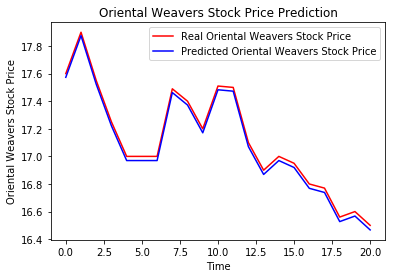

In [30]:
plt.plot(real_stock_price,color='red',label='Real Oriental Weavers Stock Price')
plt.plot(predicted_stock_prices,color='blue',label='Predicted Oriental Weavers Stock Price')
plt.title('Oriental Weavers Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Oriental Weavers Stock Price')
plt.legend()
plt.show()

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_prices))
rmse

0.029538591318429605

In [33]:
mse=mean_squared_error(real_stock_price,predicted_stock_prices)
mse

0.00087252837707720487